<a href="https://colab.research.google.com/github/reypowgithub/Tugas_Visdat_TelU_2023/blob/main/Tugas_5_Week10_Reynhard_Powiwi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**CII4L3 VISUALISASI DATA**

---

# Assignment Week-10

---

<p>Nama  = Reynhard Powiwi</p>
<p>NIM   = 1301204091</p>
<p>Kelas = IF-44-PIL-DS02 📚🎓</p>

---
Buatlah visualisasi geospatial yang menunjukkan sebaran kasus positif COVID 19 di Indonesia per tanggal 1 Juni 2021 dengan basis provinsi.

**Link Tambahan**
* [Project Kaggle](https://www.kaggle.com/reypow/geospatial-covid-in-indonesia)

In [1]:
import numpy as np
import pandas as pd
from google.colab import files
import zipfile
import os

# Upload Kaggle API key
uploaded = files.upload()

# Membuat direktori Kaggle dan memindahkan kaggle.json ke dalamnya
!mkdir ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# Unduh dataset GADM Indonesia
!kaggle datasets download -d muhammadasyri/peta-gadm-indonesia
# Unduh dataset COVID-19 Indonesia
!kaggle datasets download -d hendratno/covid19-indonesia

# Ekstrak file zip GADM Indonesia
with zipfile.ZipFile('peta-gadm-indonesia.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/gadm')

# Ekstrak file zip COVID-19 Indonesia
with zipfile.ZipFile('covid19-indonesia.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/covid')

# Daftar file yang telah diekstrak
gadm_files = os.listdir('/content/gadm')
covid_files = os.listdir('/content/covid')

# Tampilkan daftar file
print("Files in GADM dataset:", gadm_files)
print("Files in COVID-19 dataset:", covid_files)

Saving kaggle.json to kaggle.json
 81% 41.0M/50.3M [00:01<00:00, 38.5MB/s]
100% 50.3M/50.3M [00:01<00:00, 41.7MB/s]
  0% 0.00/1.22M [00:00<?, ?B/s]
100% 1.22M/1.22M [00:00<00:00, 82.9MB/s]
Files in GADM dataset: ['gadm36_IDN_3.dbf', 'gadm36_IDN_3.shp', 'gadm36_IDN_3.shx', 'Peta.png']
Files in COVID-19 dataset: ['covid_19_indonesia_time_series_all.csv']


In [5]:
# Melihat nama file yang sudah didownload dari kaggle
for dirname, _, filenames in os.walk('/content'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/content/peta-gadm-indonesia.zip
/content/covid19-indonesia.zip
/content/.config/default_configs.db
/content/.config/.last_survey_prompt.yaml
/content/.config/.last_opt_in_prompt.yaml
/content/.config/active_config
/content/.config/.last_update_check.json
/content/.config/config_sentinel
/content/.config/gce
/content/.config/logs/2023.11.22/14.27.15.959019.log
/content/.config/logs/2023.11.22/14.24.19.318032.log
/content/.config/logs/2023.11.22/14.27.25.900689.log
/content/.config/logs/2023.11.22/14.21.25.932626.log
/content/.config/logs/2023.11.22/14.24.28.281105.log
/content/.config/logs/2023.11.22/14.27.25.142127.log
/content/.config/configurations/config_default
/content/gadm/gadm36_IDN_3.dbf
/content/gadm/gadm36_IDN_3.shp
/content/gadm/gadm36_IDN_3.shx
/content/gadm/Peta.png
/content/covid/covid_19_indonesia_time_series_all.csv
/content/sample_data/anscombe.json
/content/sample_data/README.md
/content/sample_data/mnist_test.csv
/content/sample_data/california_housing_test.csv
/con

# Import dan Install

In [2]:
# Install Geopandas untuk Visualisasi Geospasial Data
! pip install geopandas

In [3]:
# Import Library yang dibutuhkan

import numpy as np
import pandas as pd
import geopandas as gpd
import numpy as np
import seaborn as sns
import textwrap
import matplotlib.pyplot as plt
import datetime
from datetime import date

# Pre-Processing Data

In [6]:
# Membaca data covid-19 di indonesia
df = pd.read_csv("/content/covid/covid_19_indonesia_time_series_all.csv")
covid_df = df.copy()
covid_df.head()

,Date,Location ISO Code,Location,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,...,Latitude,New Cases per Million,Total Cases per Million,New Deaths per Million,Total Deaths per Million,Total Deaths per 100rb,Case Fatality Rate,Case Recovered Rate,Growth Factor of New Cases,Growth Factor of New Deaths
0,3/1/2020,ID-JK,DKI Jakarta,2,0,0,2,39,20,75,...,-6.204699,0.18,3.60,0.0,1.84,0.18,51.28%,192.31%,NaN,NaN
1,3/2/2020,ID-JK,DKI Jakarta,2,0,0,2,41,20,75,...,-6.204699,0.18,3.78,0.0,1.84,0.18,48.78%,182.93%,1.0,1.0
2,3/2/2020,IDN,Indonesia,2,0,0,2,2,0,0,...,-0.789275,0.01,0.01,0.0,0.00,0.00,0.00%,0.00%,NaN,NaN
3,3/2/2020,ID-RI,Riau,1,0,0,1,1,0,1,...,0.511648,0.16,0.16,0.0,0.00,0.00,0.00%,100.00%,NaN,NaN
4,3/3/2020,ID-JK,DKI Jakarta,2,0,0,2,43,20,75,...,-6.204699,0.18,3.96,0.0,1.84,0.18,46.51%,174.42%,1.0,1.0


In [7]:
# Merubah format tanggal
date2=[]
for item in covid_df['Date']:
    item2=item.split('/')
    month=int(item2[0])
    day=int(item2[1])
    year=int(item2[2])
    date2+=[datetime.date(year,month,day)]
covid_df['Date']=date2
covid_df['Date'] = pd.to_datetime(df['Date'])
covid_df.head()

,Date,Location ISO Code,Location,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,...,Latitude,New Cases per Million,Total Cases per Million,New Deaths per Million,Total Deaths per Million,Total Deaths per 100rb,Case Fatality Rate,Case Recovered Rate,Growth Factor of New Cases,Growth Factor of New Deaths
0,2020-03-01,ID-JK,DKI Jakarta,2,0,0,2,39,20,75,...,-6.204699,0.18,3.60,0.0,1.84,0.18,51.28%,192.31%,NaN,NaN
1,2020-03-02,ID-JK,DKI Jakarta,2,0,0,2,41,20,75,...,-6.204699,0.18,3.78,0.0,1.84,0.18,48.78%,182.93%,1.0,1.0
2,2020-03-02,IDN,Indonesia,2,0,0,2,2,0,0,...,-0.789275,0.01,0.01,0.0,0.00,0.00,0.00%,0.00%,NaN,NaN
3,2020-03-02,ID-RI,Riau,1,0,0,1,1,0,1,...,0.511648,0.16,0.16,0.0,0.00,0.00,0.00%,100.00%,NaN,NaN
4,2020-03-03,ID-JK,DKI Jakarta,2,0,0,2,43,20,75,...,-6.204699,0.18,3.96,0.0,1.84,0.18,46.51%,174.42%,1.0,1.0


In [8]:
# menghapus kolom yang tidak diperlukan
covid_df.drop(["Location ISO Code", "New Cases", "New Deaths", "New Recovered", "New Active Cases", "Province", "Country", "Continent", "Island", "Time Zone",
                "Special Status", "Total Regencies", "Total Cities", "Total Districts", "Total Urban Villages", "Total Rural Villages", "Area (km2)",
                "New Cases per Million", "Total Cases per Million","New Deaths per Million", "Total Deaths per Million", "Case Fatality Rate",
                "Case Recovered Rate", "Growth Factor of New Cases","Growth Factor of New Deaths", "City or Regency"],axis=1,inplace=True)

In [9]:
# Menghapus data yang duplikat pada kolom 'Location' dan mempertahankan baris terakhir
covid_newest = covid_df.drop_duplicates(subset='Location', keep="last").copy()
covid_newest.head()

,Date,Location,Total Cases,Total Deaths,Total Recovered,Total Active Cases,Location Level,Population,Population Density,Longitude,Latitude,Total Deaths per 100rb
31759,2022-09-14,Gorontalo,13951,487,13433,31,Province,1180651,104.88,122.376058,0.687003,41.25
31780,2022-09-14,Sulawesi Barat,15601,394,15201,6,Province,1559984,92.93,119.345019,-2.461746,25.26
31788,2022-09-15,Aceh,44038,2223,41713,102,Province,5247257,90.54,96.910522,4.225615,42.36
31789,2022-09-15,Bali,166831,4731,161629,471,Province,4216171,729.43,115.131714,-8.369472,112.21
31790,2022-09-15,Banten,333875,2950,328482,2443,Province,10722374,1109.64,106.109004,-6.456736,27.51


# EDA

In [10]:
# melihat infromasi dari dataframe
covid_newest.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35 entries, 31759 to 31821
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Date                    35 non-null     datetime64[ns]
 1   Location                35 non-null     object        
 2   Total Cases             35 non-null     int64         
 3   Total Deaths            35 non-null     int64         
 4   Total Recovered         35 non-null     int64         
 5   Total Active Cases      35 non-null     int64         
 6   Location Level          35 non-null     object        
 7   Population              35 non-null     int64         
 8   Population Density      35 non-null     float64       
 9   Longitude               35 non-null     float64       
 10  Latitude                35 non-null     float64       
 11  Total Deaths per 100rb  35 non-null     float64       
dtypes: datetime64[ns](1), float64(4), int64(5), o

Membuat visualisasi untuk menampilkan 10 Provinsi Teratas Dengan Total Kasus Paling Banyak

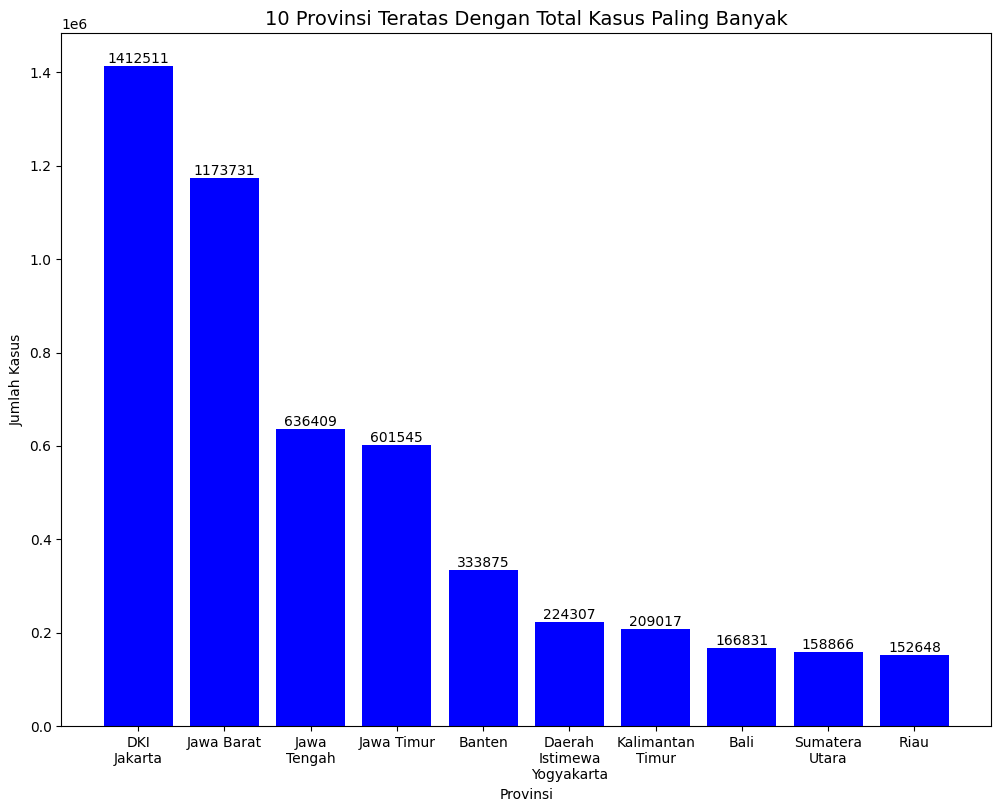

In [11]:
# Provinsi dengan Total Kasus Terbanyak
total_cases_data = covid_newest[covid_newest.Location != 'Indonesia'].sort_values(by=['Total Cases'], ascending=False).head(10)

# Membuat plot bar
plt.figure(figsize=(12, 9))
bars = plt.bar(total_cases_data['Location'], total_cases_data['Total Cases'], color='blue')

# Menambahkan angka pada setiap bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 5, round(yval), ha='center', va='bottom', fontsize=10, color='black')

# Menambahkan label dan judul
plt.title('10 Provinsi Teratas Dengan Total Kasus Paling Banyak', fontsize=14)
plt.xlabel('Provinsi')
plt.ylabel('Jumlah Kasus')

# Mengatur teks pada label sumbu x
plt.xticks(ticks=total_cases_data['Location'], labels=[textwrap.fill(label, width=10) for label in total_cases_data['Location']], fontsize=10)


# Menampilkan plot
plt.show()

Membuat visualisasi untuk menampilkan 10 Provinsi Teratas Dengan Total Kematian Terbanyak

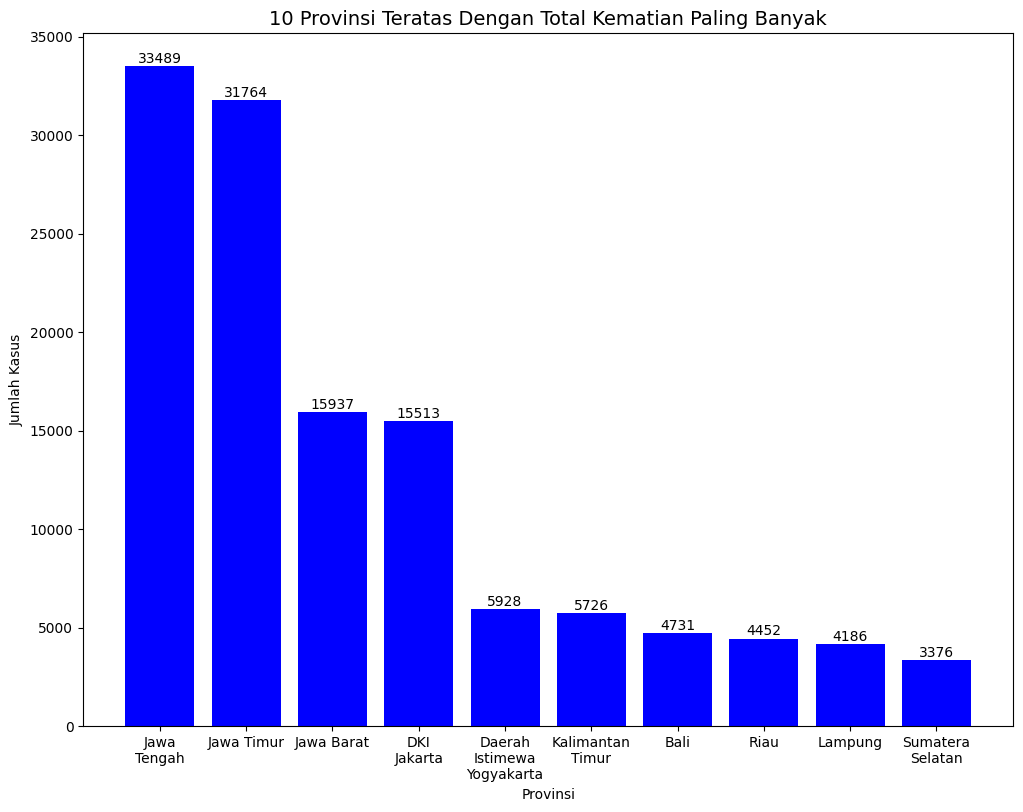

In [12]:
# Provinsi dengan Total Kematian Terbanyak
total_death_data = covid_newest[covid_newest.Location != 'Indonesia'].sort_values(by=['Total Deaths'], ascending=False).head(10)

# Membuat plot bar
plt.figure(figsize=(12, 9))
bars = plt.bar(total_death_data['Location'], total_death_data['Total Deaths'], color='blue')

# Menambahkan angka pada setiap bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 5, round(yval), ha='center', va='bottom', fontsize=10, color='black')

# Menambahkan label dan judul
plt.title('10 Provinsi Teratas Dengan Total Kematian Paling Banyak', fontsize=14)
plt.xlabel('Provinsi')
plt.ylabel('Jumlah Kasus')

# Mengatur teks pada label sumbu x
plt.xticks(ticks=total_death_data['Location'], labels=[textwrap.fill(label, width=10) for label in total_death_data['Location']], fontsize=10)


# Menampilkan plot
plt.show()

Membuat visualisasi untuk menampilkan 10 Provinsi Teratas Dengan Total Sembuh Terbanyak

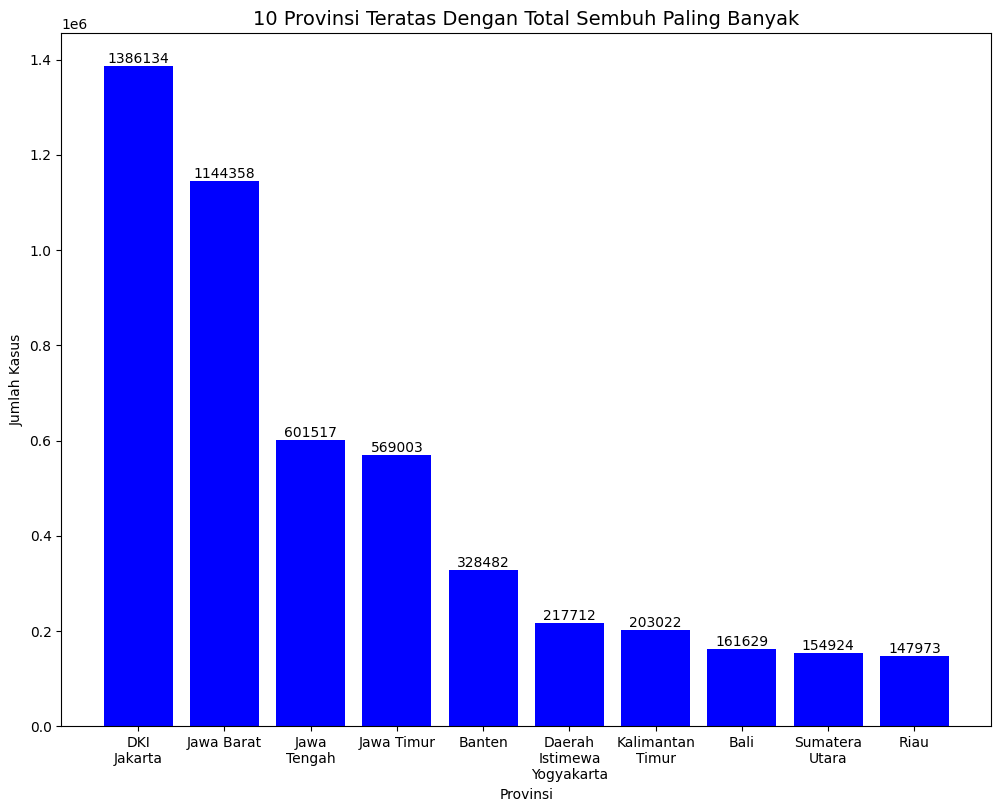

In [13]:
# Provinsi dengan Total Sembuh Terbanyak
total_Recovered_data = covid_newest[covid_newest.Location != 'Indonesia'].sort_values(by=['Total Recovered'], ascending=False).head(10)

# Membuat plot bar
plt.figure(figsize=(12, 9))
bars = plt.bar(total_Recovered_data['Location'],total_Recovered_data['Total Recovered'], color='blue')

# Menambahkan angka pada setiap bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 5, round(yval), ha='center', va='bottom', fontsize=10, color='black')

# Menambahkan label dan judul
plt.title('10 Provinsi Teratas Dengan Total Sembuh Paling Banyak', fontsize=14)
plt.xlabel('Provinsi')
plt.ylabel('Jumlah Kasus')

# Mengatur teks pada label sumbu x
plt.xticks(ticks=total_Recovered_data['Location'], labels=[textwrap.fill(label, width=10) for label in total_Recovered_data['Location']], fontsize=10)


# Menampilkan plot
plt.show()

Membuat visualisasi untuk menampilkan 10 Provinsi Teratas Dengan Total Kasus Aktif Terbanyak

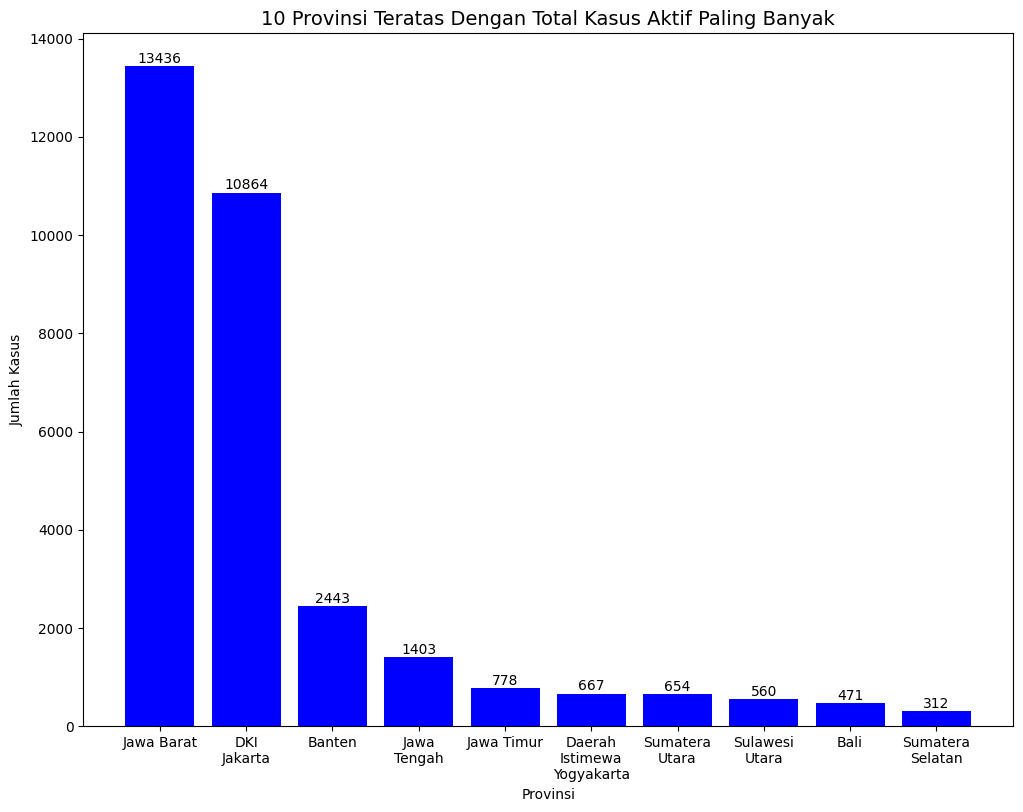

In [14]:
# Provinsi dengan Total Kasus Aktif Terbanyak
total_active_data = covid_newest[covid_newest.Location != 'Indonesia'].sort_values(by=['Total Active Cases'], ascending=False).head(10)

# Membuat plot bar
plt.figure(figsize=(12, 9))
bars = plt.bar(total_active_data['Location'], total_active_data['Total Active Cases'], color='blue')

# Menambahkan angka pada setiap bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 5, round(yval), ha='center', va='bottom', fontsize=10, color='black')

# Menambahkan label dan judul
plt.title('10 Provinsi Teratas Dengan Total Kasus Aktif Paling Banyak', fontsize=14)
plt.xlabel('Provinsi')
plt.ylabel('Jumlah Kasus')

# Mengatur teks pada label sumbu x
plt.xticks(ticks=total_active_data['Location'], labels=[textwrap.fill(label, width=10) for label in total_active_data['Location']], fontsize=10)


# Menampilkan plot
plt.show()

# Visualisasi Mapping Covid 19 di wilayah NKRI

In [16]:
#  membaca data geospasial (shapefile) dari file
data_geo = gpd.read_file('/content/gadm/gadm36_IDN_3.shp')
data_geo.drop(["NAME_0"],axis=1,inplace=True)
data_geo.rename(columns = {"NAME_1":"Provinsi"}, inplace = True)
data_geo['Provinsi'].replace({"Jakarta Raya":"DKI Jakarta"},inplace=True)
data_geo.head()

,GID_0,GID_1,Provinsi,NL_NAME_1,GID_2,NAME_2,NL_NAME_2,GID_3,NAME_3,VARNAME_3,NL_NAME_3,TYPE_3,ENGTYPE_3,CC_3,HASC_3,geometry
0,IDN,IDN.1_1,Aceh,None,IDN.1.2_1,Aceh Barat,None,IDN.1.2.1_1,Arongan Lambalek,None,None,Kecamatan,Sub-district,1107062,None,"POLYGON ((95.97953 4.31063, 95.98042 4.30927, ..."
1,IDN,IDN.1_1,Aceh,None,IDN.1.2_1,Aceh Barat,None,IDN.1.2.2_1,Bubon,None,None,Kecamatan,Sub-district,1107061,None,"POLYGON ((96.16601 4.27803, 96.16323 4.27509, ..."
2,IDN,IDN.1_1,Aceh,None,IDN.1.2_1,Aceh Barat,None,IDN.1.2.3_1,Johan Pahlawan,None,None,Kecamatan,Sub-district,1107050,None,"POLYGON ((96.13205 4.13408, 96.13216 4.13404, ..."
3,IDN,IDN.1_1,Aceh,None,IDN.1.2_1,Aceh Barat,None,IDN.1.2.4_1,Kaway Xvi,None,None,Kecamatan,Sub-district,1107080,None,"POLYGON ((96.16397 4.19111, 96.16402 4.18973, ..."
4,IDN,IDN.1_1,Aceh,None,IDN.1.2_1,Aceh Barat,None,IDN.1.2.5_1,Meureubo,None,None,Kecamatan,Sub-district,1107081,None,"POLYGON ((96.25119 4.12990, 96.24657 4.12608, ..."


In [17]:
# Merubah nama kolom Location menjadi Provinsi
covid_newest.rename(columns={'Location':'Provinsi'},inplace=True)
covid_newest

,Date,Provinsi,Total Cases,Total Deaths,Total Recovered,Total Active Cases,Location Level,Population,Population Density,Longitude,Latitude,Total Deaths per 100rb
31759,2022-09-14,Gorontalo,13951,487,13433,31,Province,1180651,104.88,122.376058,0.687003,41.25
31780,2022-09-14,Sulawesi Barat,15601,394,15201,6,Province,1559984,92.93,119.345019,-2.461746,25.26
31788,2022-09-15,Aceh,44038,2223,41713,102,Province,5247257,90.54,96.910522,4.225615,42.36
31789,2022-09-15,Bali,166831,4731,161629,471,Province,4216171,729.43,115.131714,-8.369472,112.21
31790,2022-09-15,Banten,333875,2950,328482,2443,Province,10722374,1109.64,106.109004,-6.456736,27.51
31791,2022-09-15,Bengkulu,29173,522,28617,34,Province,1999539,100.38,102.338421,-3.533584,26.11
31792,2022-09-15,DKI Jakarta,1412511,15513,1386134,10864,Province,10846145,16334.31,106.836118,-6.204699,143.03
31793,2022-09-15,Daerah Istimewa Yogyakarta,224307,5928,217712,667,Province,3631015,1158.90,110.444878,-7.894502,163.26
31795,2022-09-15,Jambi,38643,889,37681,73,Province,3493357,69.79,102.723640,-1.697698,25.45
31796,2022-09-15,Jawa Barat,1173731,15937,1144358,13436,Province,45161325,1276.55,107.603708,-6.920432,35.29


In [18]:
#Merge Peta
covid_peta = data_geo.merge(covid_newest.sort_values(by='Provinsi'),on='Provinsi')
covid_peta

,GID_0,GID_1,Provinsi,NL_NAME_1,GID_2,NAME_2,NL_NAME_2,GID_3,NAME_3,VARNAME_3,...,Total Cases,Total Deaths,Total Recovered,Total Active Cases,Location Level,Population,Population Density,Longitude,Latitude,Total Deaths per 100rb
0,IDN,IDN.1_1,Aceh,None,IDN.1.2_1,Aceh Barat,None,IDN.1.2.1_1,Arongan Lambalek,None,...,44038,2223,41713,102,Province,5247257,90.54,96.910522,4.225615,42.36
1,IDN,IDN.1_1,Aceh,None,IDN.1.2_1,Aceh Barat,None,IDN.1.2.2_1,Bubon,None,...,44038,2223,41713,102,Province,5247257,90.54,96.910522,4.225615,42.36
2,IDN,IDN.1_1,Aceh,None,IDN.1.2_1,Aceh Barat,None,IDN.1.2.3_1,Johan Pahlawan,None,...,44038,2223,41713,102,Province,5247257,90.54,96.910522,4.225615,42.36
3,IDN,IDN.1_1,Aceh,None,IDN.1.2_1,Aceh Barat,None,IDN.1.2.4_1,Kaway Xvi,None,...,44038,2223,41713,102,Province,5247257,90.54,96.910522,4.225615,42.36
4,IDN,IDN.1_1,Aceh,None,IDN.1.2_1,Aceh Barat,None,IDN.1.2.5_1,Meureubo,None,...,44038,2223,41713,102,Province,5247257,90.54,96.910522,4.225615,42.36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6570,IDN,IDN.32_1,Sumatera Utara,None,IDN.32.34_1,Toba Samosir,None,IDN.32.34.12_1,Siantar Narumonda,None,...,158866,3288,154924,654,Province,14874889,203.82,99.051964,2.191894,22.10
6571,IDN,IDN.32_1,Sumatera Utara,None,IDN.32.34_1,Toba Samosir,None,IDN.32.34.13_1,Sigumpar,None,...,158866,3288,154924,654,Province,14874889,203.82,99.051964,2.191894,22.10
6572,IDN,IDN.32_1,Sumatera Utara,None,IDN.32.34_1,Toba Samosir,None,IDN.32.34.14_1,Silaen,None,...,158866,3288,154924,654,Province,14874889,203.82,99.051964,2.191894,22.10
6573,IDN,IDN.32_1,Sumatera Utara,None,IDN.32.34_1,Toba Samosir,None,IDN.32.34.15_1,Tampahan,None,...,158866,3288,154924,654,Province,14874889,203.82,99.051964,2.191894,22.10


Text(0.5, 0.98, 'Peta Covid-19 Indonesia')

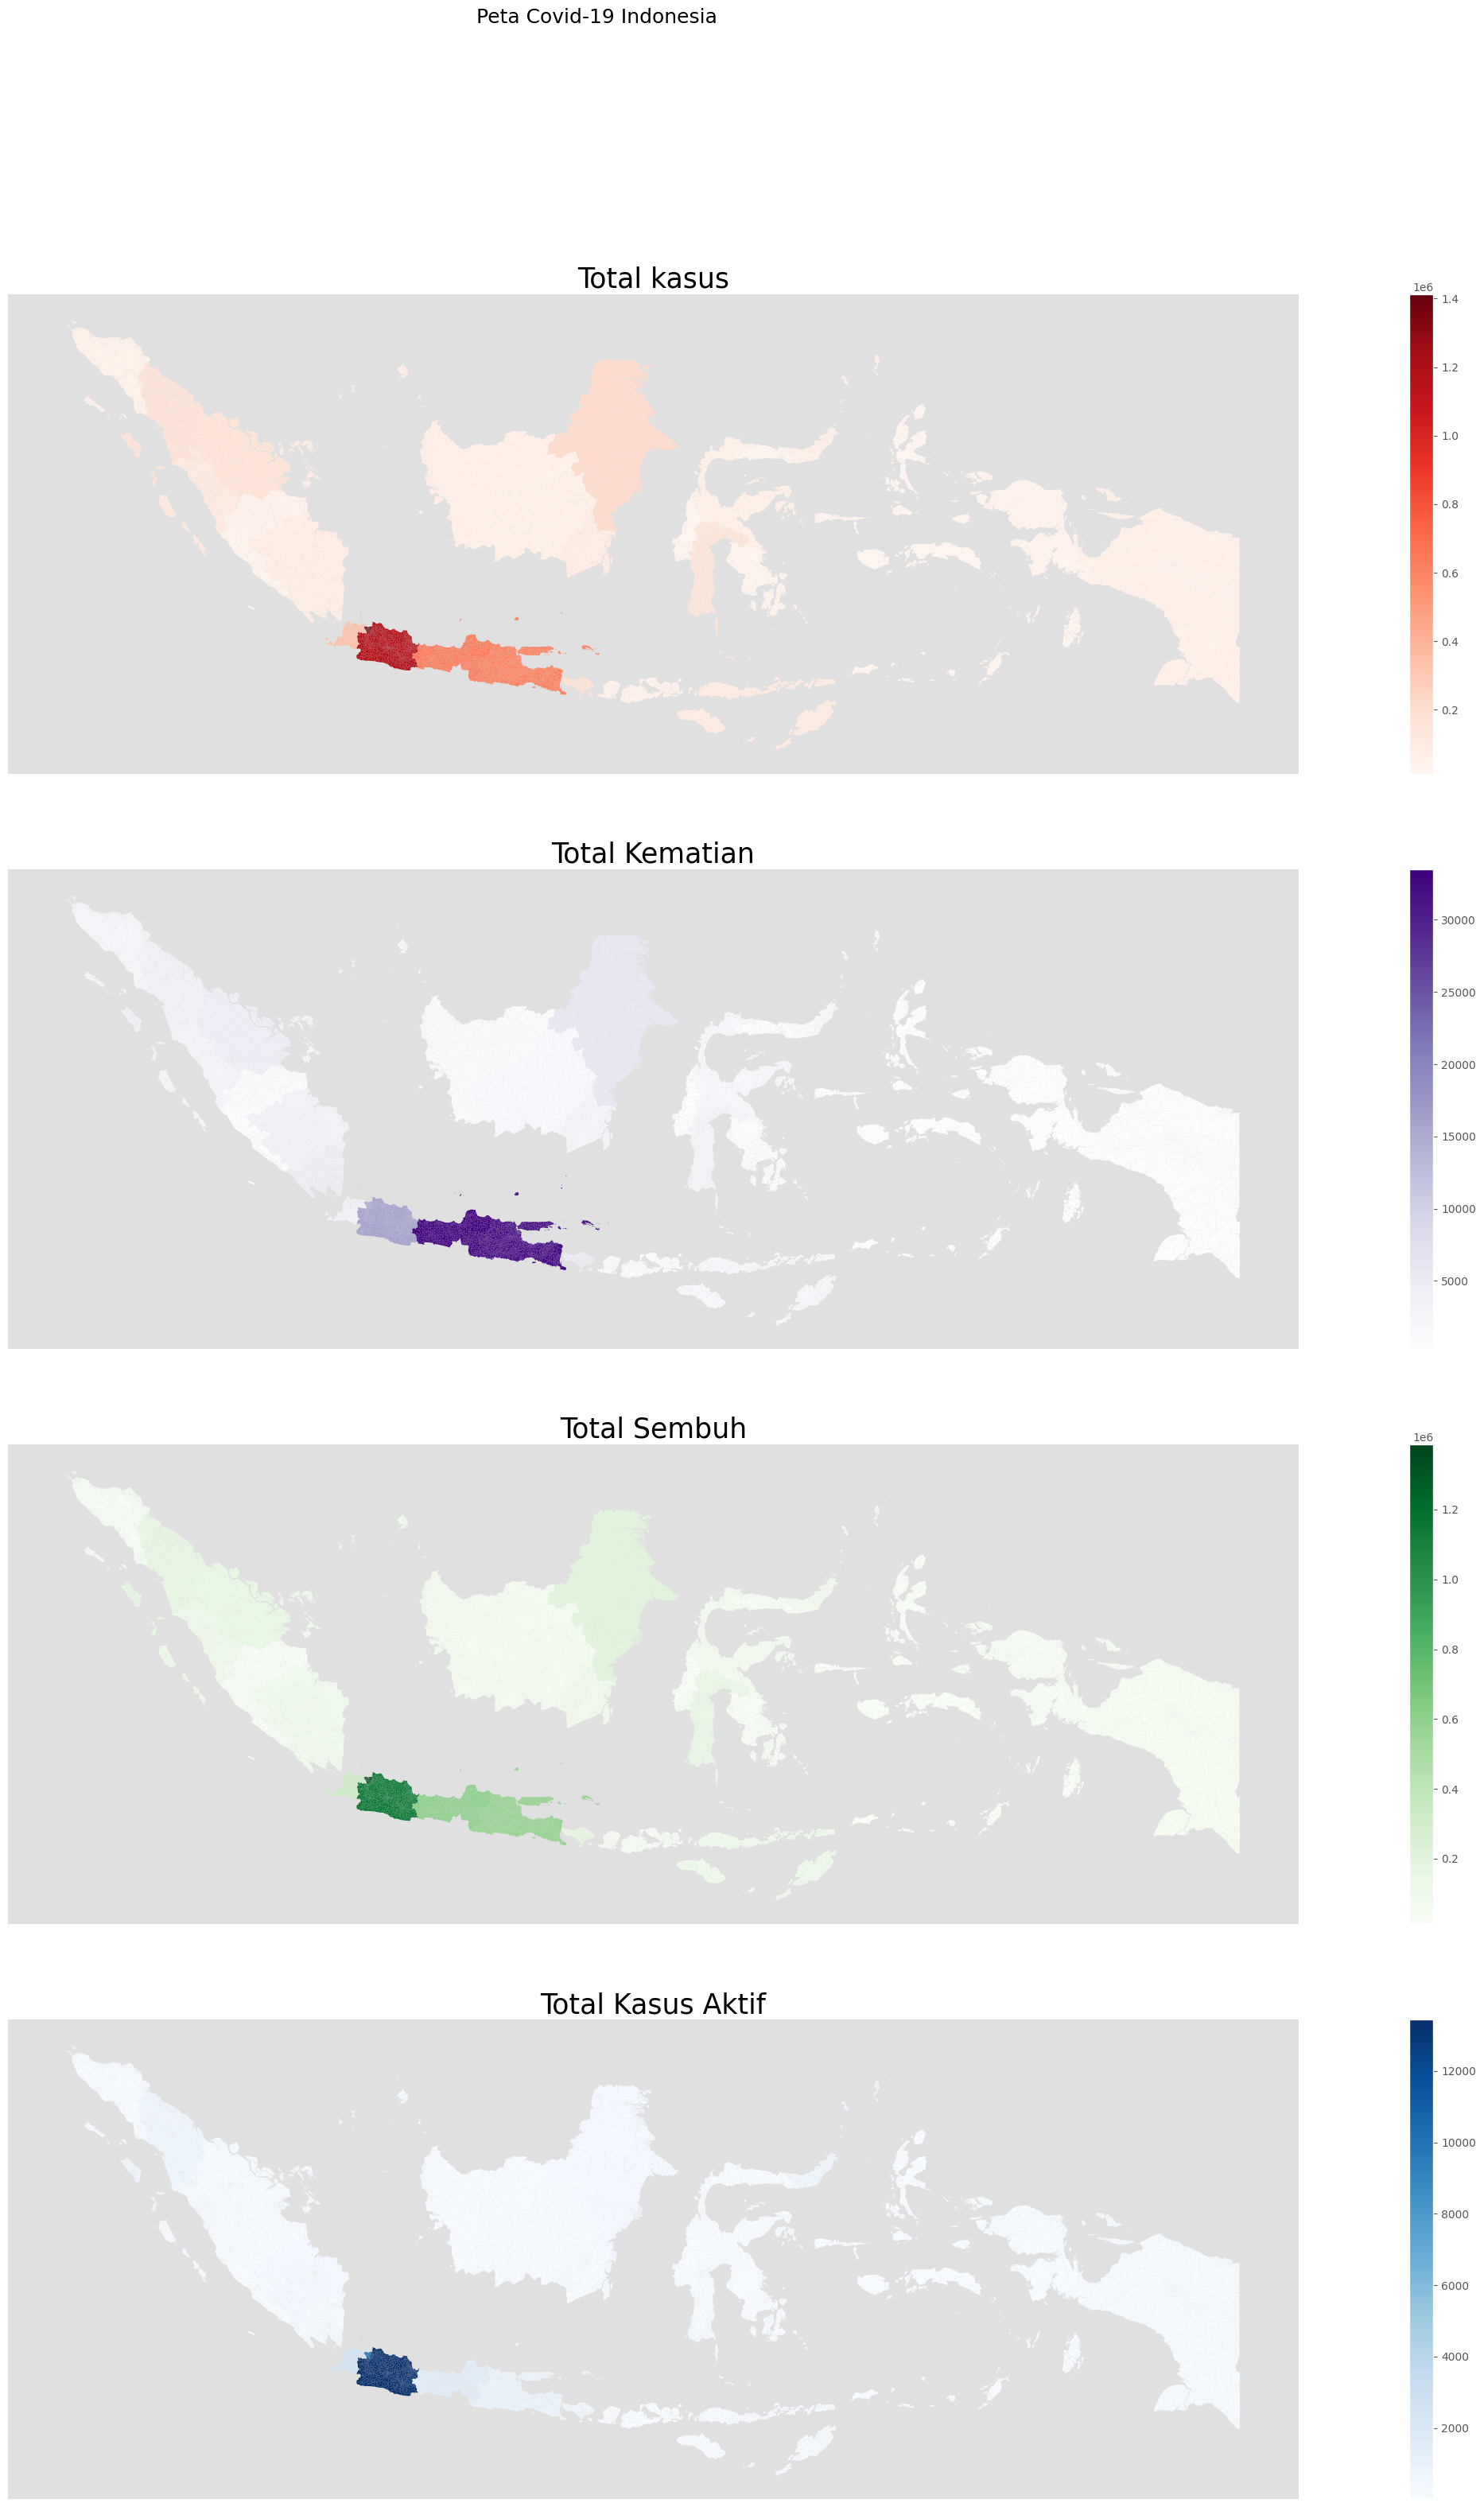

In [19]:
#Membuat persebaran data dengan geospasial

fig,ax = plt.subplots(4,figsize=(36,36))
plt.style.use('ggplot')
covid_peta.plot(column='Total Cases',cmap='Reds',figsize=(9,36),legend=True,ax=ax[0])
ax[0].set_title('Total kasus',fontsize=25)
covid_peta.plot(column='Total Deaths',cmap='Purples',figsize=(9,36),legend=True,ax=ax[1])
ax[1].set_title('Total Kematian',fontsize=25)
covid_peta.plot(column='Total Recovered',cmap='Greens',figsize=(9,36),legend=True,ax=ax[2])
ax[2].set_title('Total Sembuh',fontsize=25)
covid_peta.plot(column='Total Active Cases',cmap='Blues',figsize=(9,36),legend=True,ax=ax[3])
ax[3].set_title('Total Kasus Aktif',fontsize=25)

#add background color
ax[0].set_facecolor('#e0e0e0')
ax[1].set_facecolor('#e0e0e0')
ax[2].set_facecolor('#e0e0e0')
ax[3].set_facecolor('#e0e0e0')

for i in np.arange(4):
    ax[i].spines['top'].set_visible(False)
    ax[i].spines['right'].set_visible(False)
    ax[i].spines['left'].set_visible(False)
    ax[i].spines['bottom'].set_visible(False)
    for item in ax[i].get_xticklabels():
        item.set_visible(False)
    for item in ax[i].get_yticklabels():
        item.set_visible(False)
    ax[i].set_xticks([])
    ax[i].set_yticks([])
fig.suptitle('Peta Covid-19 Indonesia', fontsize=18)